# Planeta circunbinario

Seguimos el paper de Li et al. (2014), donde él obtiene soluciones analíticas para elementos orbitales con un Hamiltoniano cuadrupolar


De esas soluciones, ellos obtienen expresiones para el período de h2 ($\Omega_2$) y g2 ($\omega_2$), y queremos reproducir la Fig. 2, donde enfrenta $P_{h2}$ y $P_{g2}$ vs F

#### El tema es que el paper no da expresión explícita para $P_{g2}$, y por eso en este notebook nos restringimos a $P_{h2}$

In [42]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import special

pi = -4*np.arctan(-1)

G = 3.963644418946e-14        # AU^3 Msol^-1 s^-2

G = 0.01720209895**2          # AU^3 Msol^-1 dias^-2

Probamos que funciona la función elíptica que deberemos aplicar más adelante

In [35]:
sp.special.ellipk(0)

1.5707963267948966

### Definimos $P_{h2}$ para circulación y para libración

In [51]:
def Ph2_c(m1,e1,a1,m2,e2,a2,F):         # CIRCULACION 2.12
    
    # Unidades en unidades astronomicas, masas solares y dias
    
    a = np.sqrt(np.abs(F - 1 + e1*e1)/(1- e1*e1))
    b = np.sqrt((1+ 4*e1*e1 - F)/(1+ 4*e1*e1))
    
    alfa = a1/a2
    
    T1 = np.sqrt((a1**3)*4*pi*pi/(G*(m1+m2)))
    
    cte = 8*((m1 + m2)**2)/(3*(alfa**(7/2))*m1*m2*b)
    k = np.sqrt(1- (a/b)**2)
    
    K = sp.special.ellipk(k)
    
    f = cte*((1- e2**2)**2)*K*T1/(np.sqrt((1- e1**2)*(1+ 4*e1*e1)))
    
    return(f)

In [89]:
def Ph2_l(m1,e1,a1,m2,e2,a2,F):           # LIBRACION 2.15
    
    # Unidades en unidades astronomicas, masas solares y dias
    
    a = np.sqrt(np.abs(F - 1 + e1*e1)/(1- e1*e1))
    b = np.sqrt((1+ 4*e1*e1 - F)/(1+ 4*e1*e1))
    
    alfa = a1/a2
    
    T1 = np.sqrt((a1**3)*4*pi*pi/(G*(m1+m2)))
    
    cte = 16*((m1 + m2)**2)/(3*(5**0.5)*(alfa**(7/2))*m1*m2*b)
    k = np.sqrt((b**2)/(a*a + b*b))
           
    K = sp.special.ellipk(k)    
        
    f = cte*((1- e2**2)**2)*K*T1/((e1)*(F**0.5))
    
    return(f)

In [90]:
def P(m1,e1,a1,m2,e2,a2,F):
    Fsep = (1 - e1*e1)
    
    if (F<Fsep):
        f = Ph2_c(m1,e1,a1,m2,e2,a2,F)
    else:
        f = Ph2_l(m1,e1,a1,m2,e2,a2,F)
    
    return(f)

### PARÁMETROS

In [104]:
m1 = 0.9
m2 = 0.57
a1 = 0.19
e1 = 0.23
a2 = 0.71
e2 = 0.06

Fsep = 1 - e1*e1

### HAMILTONIANO

In [92]:
def F(e1,nodo2,inc2):
    f = (1 - e1*e1 + 5*e1*e1*(np.sin(nodo2)**2))*(np.sin(inc2)**2)
    return(f)

# Hay un problemita que es que para F = 0, ambos períodos (de lib. y de circ.) deberían ser iguales, pero eso no sucede

In [93]:
Ph2_c(m1,e1,a1,m2,e2,a2,0.)/365.25

112.67883659977747

In [94]:
Ph2_l(m1,e1,a1,m2,e2,a2,0.)/365.25

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


inf

#### No sé bien para qué está la siguiente celda pero me da miedo borrarla, creo que estábamos probando algo en el momento

In [95]:
F = 0
a = np.sqrt(np.abs(F - 1 + e1*e1)/(1- e1*e1))
b = np.sqrt((1+ 4*e1*e1 - F)/(1+ 4*e1*e1))

alfa = a1/a2

T1 = np.sqrt((a1**3)*4*pi*pi/(G*(m1+m2)))

cte = 8*((m1 + m2)**2)/(3*(alfa**(7/2))*m1*m2*b)
k = np.sqrt(1- (a/b)**2)

K = sp.special.ellipk(k)

f = cte*((1- e2**2)**2)*K*T1/(np.sqrt((1- e1**2)*(1+ 4*e1*e1)))

print(a,b,T1,k,K,f/365.25)

1.0 1.0 24.949977650181754 0.0 1.5707963267948966 112.67883659977747


### Graficamos ambos P para ver cuánto difieren en F = 0

In [119]:
F_cl = np.linspace(0,Fsep,500)
F_ll = np.linspace(Fsep,1.2,500)

P_cl = [Ph2_c(m1,e1,a1,m2,e2,a2,i)/365.25 for i in F_cl]

P_ll = [Ph2_l(m1,e1,a1,m2,e2,a2,i)/365.25 for i in F_ll]

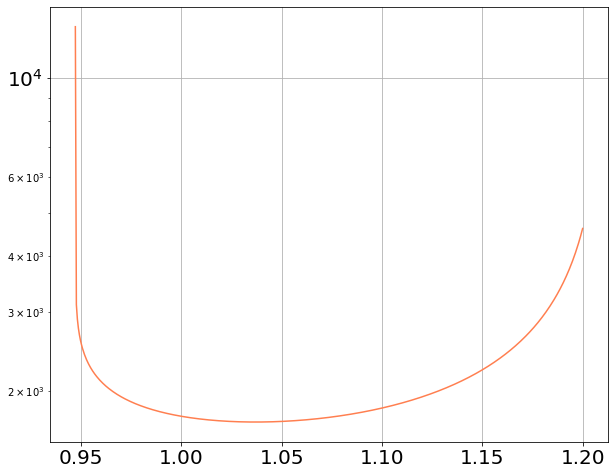

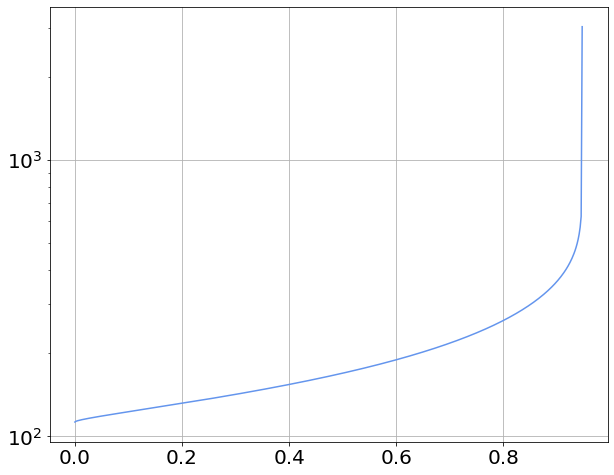

In [120]:
plt.figure(figsize=(10,8))

# plt.plot(F_cl,P_cl,c='cornflowerblue')
plt.plot(F_ll,P_ll,c='coral')

# plt.ylim(10,1000)
# plt.xlim(0,1.2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)

plt.yscale('log')    
plt.show()

plt.figure(figsize=(10,8))

plt.plot(F_cl,P_cl,c='cornflowerblue')
# plt.plot(F_ll,P_ll,c='coral')

# plt.ylim(10,1000)
# plt.xlim(0,1.2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)

plt.yscale('log')    
plt.show()

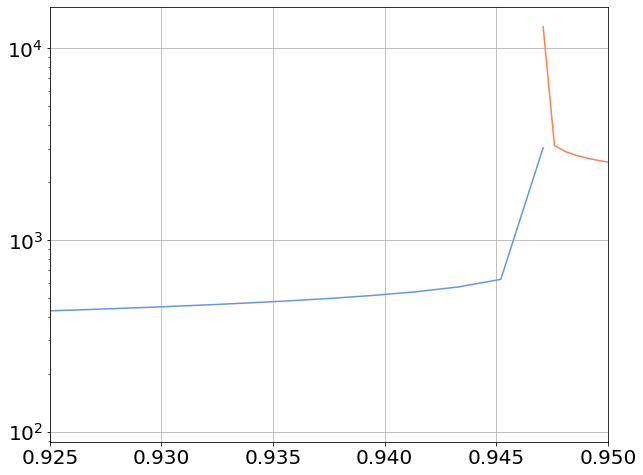

In [123]:
plt.figure(figsize=(10,8))

plt.plot(F_cl,P_cl,c='cornflowerblue')
plt.plot(F_ll,P_ll,c='coral')

# plt.ylim(10,1000)
plt.xlim(0.925,.95)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)

plt.yscale('log')    
plt.show()

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


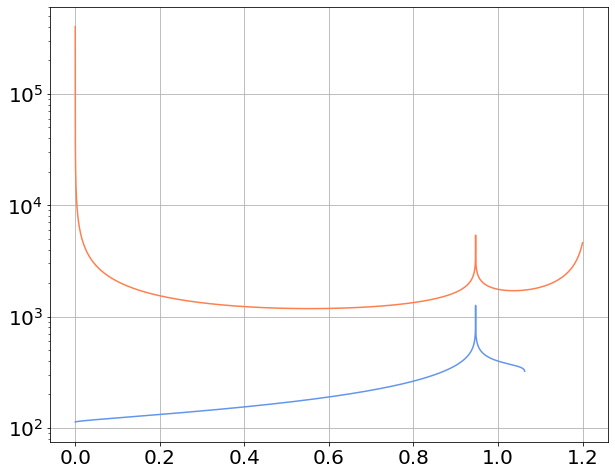

In [116]:
F_l = np.linspace(0,1.2,500000)

P_cl = [Ph2_c(m1,e1,a1,m2,e2,a2,i)/365.25 for i in F_l]

P_ll = [Ph2_l(m1,e1,a1,m2,e2,a2,i)/365.25 for i in F_l]

plt.figure(figsize=(10,8))

plt.plot(F_l,P_cl,c='cornflowerblue')
plt.plot(F_l,P_ll,c='coral')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)

plt.yscale('log')    
plt.show()